# EDA
Dibagi menjadi 3 metode:
1. Statistik Deskriptif
2. Univariate Analysis
3. Multi Variate Analysis

# Data Preprocessing

In [2]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = "https://raw.githubusercontent.com/rizalarfiyan/indonesian-food-drink-nutrition/master/assets/nutrition.csv"
res = requests.get(url, allow_redirects=True)
with open("dataset.csv", "wb") as file:
    file.write(res.content)

In [4]:
df = pd.read_csv("dataset.csv")

In [5]:
df.head(10)

,id,calories,proteins,fat,carbohydrate,name,image
0,1,280.0,9.2,28.4,0.0,Abon,https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...
1,2,513.0,23.7,37.0,21.3,Abon haruwan,https://img-global.cpcdn.com/recipes/cbf330fbd...
2,3,0.0,0.0,0.2,0.0,Agar-agar,https://res.cloudinary.com/dk0z4ums3/image/upl...
3,4,45.0,1.1,0.4,10.8,Akar tonjong segar,https://images.tokopedia.net/img/cache/200-squ...
4,5,37.0,4.4,0.5,3.8,Aletoge segar,https://nilaigizi.com/assets/images/produk/pro...
5,6,85.0,0.9,6.5,7.7,Alpukat segar,https://katakabar.com/assets/images/upload/new...
6,7,96.0,3.7,0.6,19.1,Ampas kacang hijau,https://images.tokopedia.net/img/cache/215-squ...
7,8,414.0,26.6,18.3,41.3,Ampas Tahu,https://palpres.disway.id/upload/9e9c1ba592cac...
8,9,75.0,4.1,2.1,10.7,Ampas tahu kukus,https://cdns.diadona.id/diadona.id/resized/640...
9,10,67.0,5.0,2.1,8.1,Ampas tahu mentah,https://cdn-image.hipwee.com/wp-content/upload...


In [6]:
print("Kolom : ", df.shape[1])
print("Baris : ", df.shape[0])

Kolom :  7
Baris :  1346


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1346 non-null   int64  
 1   calories      1346 non-null   float64
 2   proteins      1346 non-null   float64
 3   fat           1346 non-null   float64
 4   carbohydrate  1346 non-null   float64
 5   name          1346 non-null   object 
 6   image         1346 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 73.7+ KB


# Normalisasi Data

In [8]:
print(df.isnull().sum())

id              0
calories        0
proteins        0
fat             0
carbohydrate    0
name            0
image           0
dtype: int64


In [9]:
df.fillna(0, inplace=True)

# for column in data.select_dtypes(include="bool").columns:
#     data[column] = data[column].astype(int)

# data["variety"] = pd.factorize(data["variety"])[0]

<Axes: >

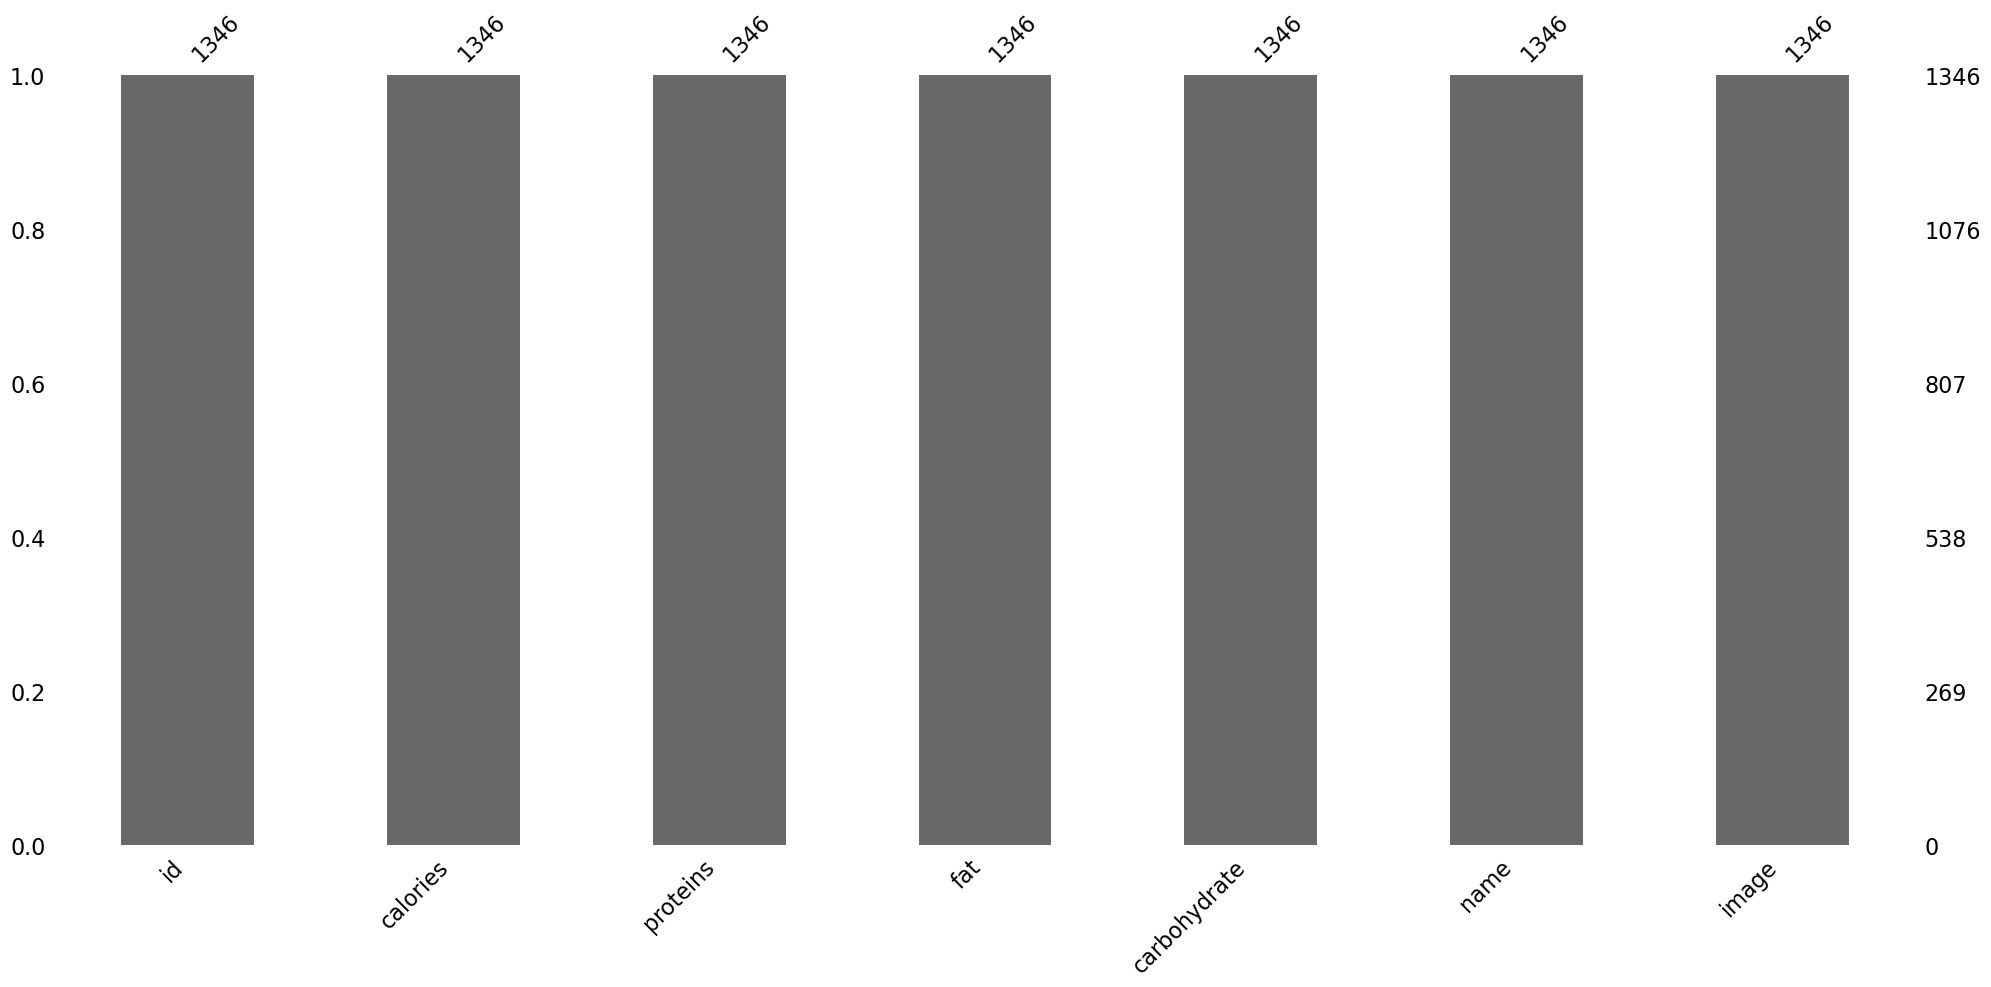

In [10]:
msno.bar(df)

In [11]:
duplicate_count = df.duplicated().sum()
print("Number of duplicates: ", duplicate_count)

Number of duplicates:  0


In [12]:
df = df.drop(["id", "image"], axis=1)

In [13]:
df.columns = df.columns.str.replace("_", " ").str.title()
print(df.columns)

Index(['Calories', 'Proteins', 'Fat', 'Carbohydrate', 'Name'], dtype='object')


In [14]:
column = ["Calories", "Proteins", "Fat", "Carbohydrate"]

# Statistik Deskriptif

In [15]:
df.describe()

,Calories,Proteins,Fat,Carbohydrate
count,1346.000000,1346.000000,1346.000000,1346.000000
mean,203.217385,10.001189,7.584027,25.390193
std,163.075430,11.847980,13.733063,32.193054
min,0.000000,0.000000,0.000000,0.000000
25%,75.000000,1.800000,0.500000,4.525000
50%,146.000000,5.000000,2.000000,13.300000
75%,333.750000,15.000000,8.275000,37.575000
max,940.000000,83.000000,100.000000,647.000000


In [16]:
df.describe(include=["object"])

,Name
count,1346
unique,1346
top,Abon
freq,1


In [17]:
df["Name"].value_counts()

Name
Abon                         1
Mie basah                    1
Minyak Ikan                  1
Minyak Hati Hiu (Eulamia)    1
Mie Sagu                     1
                            ..
Ikan Gabus asap mentah       1
Ikan Ekor Kuning             1
Ikan daun segar              1
Ikan calo/ peda mentah       1
Yoghurt                      1
Name: count, Length: 1346, dtype: int64

In [18]:
df["Name"].value_counts(normalize=True)

Name
Abon                         0.000743
Mie basah                    0.000743
Minyak Ikan                  0.000743
Minyak Hati Hiu (Eulamia)    0.000743
Mie Sagu                     0.000743
                               ...   
Ikan Gabus asap mentah       0.000743
Ikan Ekor Kuning             0.000743
Ikan daun segar              0.000743
Ikan calo/ peda mentah       0.000743
Yoghurt                      0.000743
Name: proportion, Length: 1346, dtype: float64

# Univariate Analysis

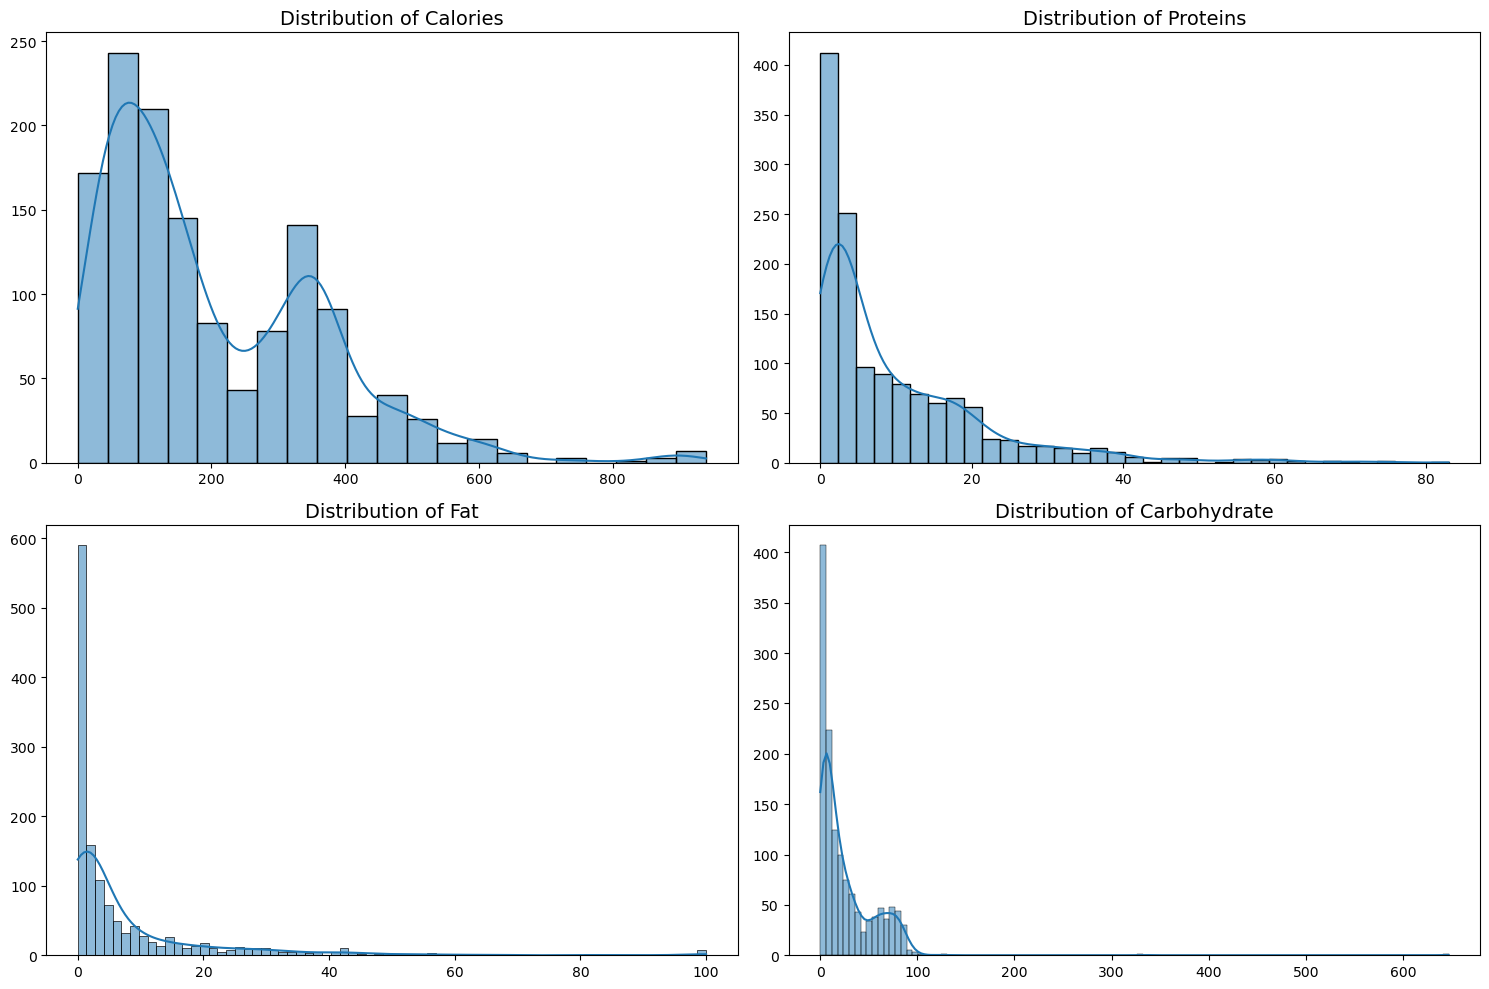

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.ravel()
for i, col in enumerate(column):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()

# Multi Variate Analysis

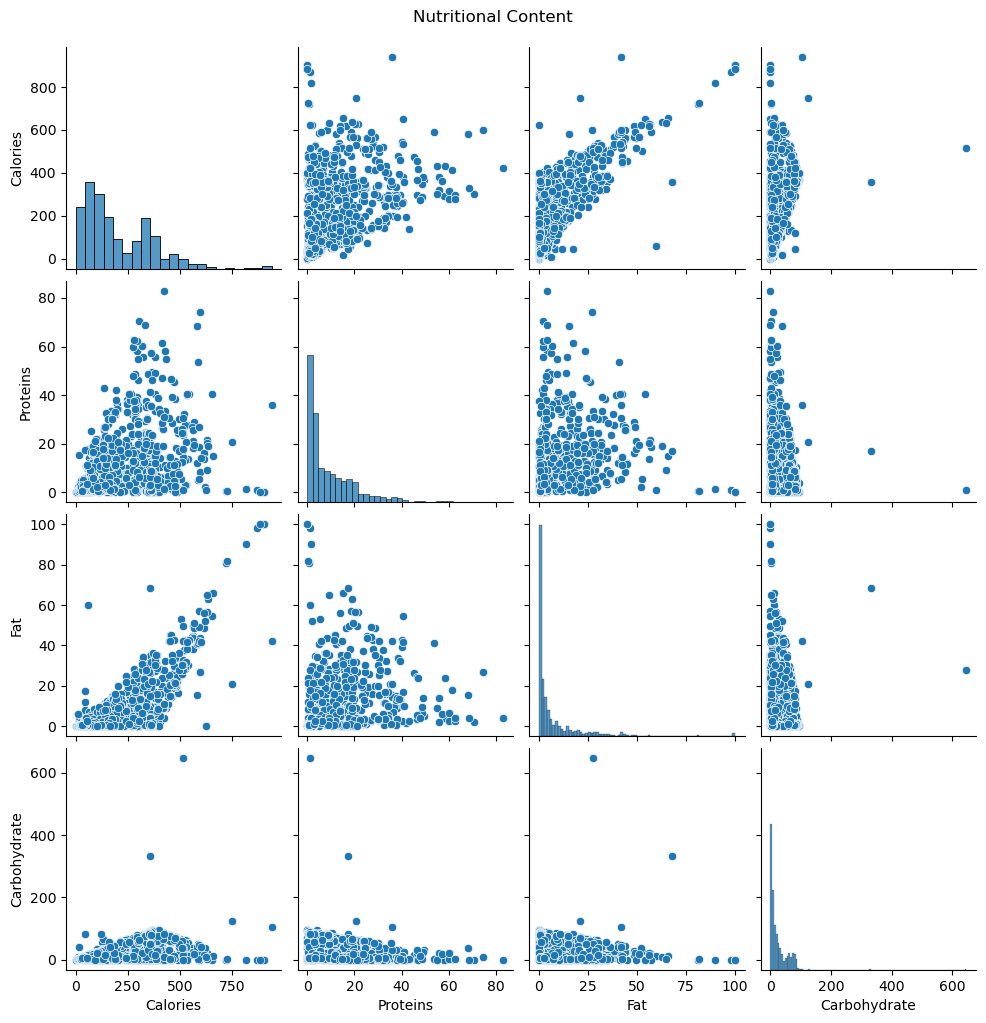

In [20]:
multivariate_data = df[column]

sns.pairplot(multivariate_data)
plt.suptitle("Nutritional Content", y=1.02)
plt.show()

## Handle Outliers

In [21]:
df1 = df.copy()
df1.head()

,Calories,Proteins,Fat,Carbohydrate,Name
0,280.0,9.2,28.4,0.0,Abon
1,513.0,23.7,37.0,21.3,Abon haruwan
2,0.0,0.0,0.2,0.0,Agar-agar
3,45.0,1.1,0.4,10.8,Akar tonjong segar
4,37.0,4.4,0.5,3.8,Aletoge segar


0 Calories
1 Proteins
2 Fat
3 Carbohydrate


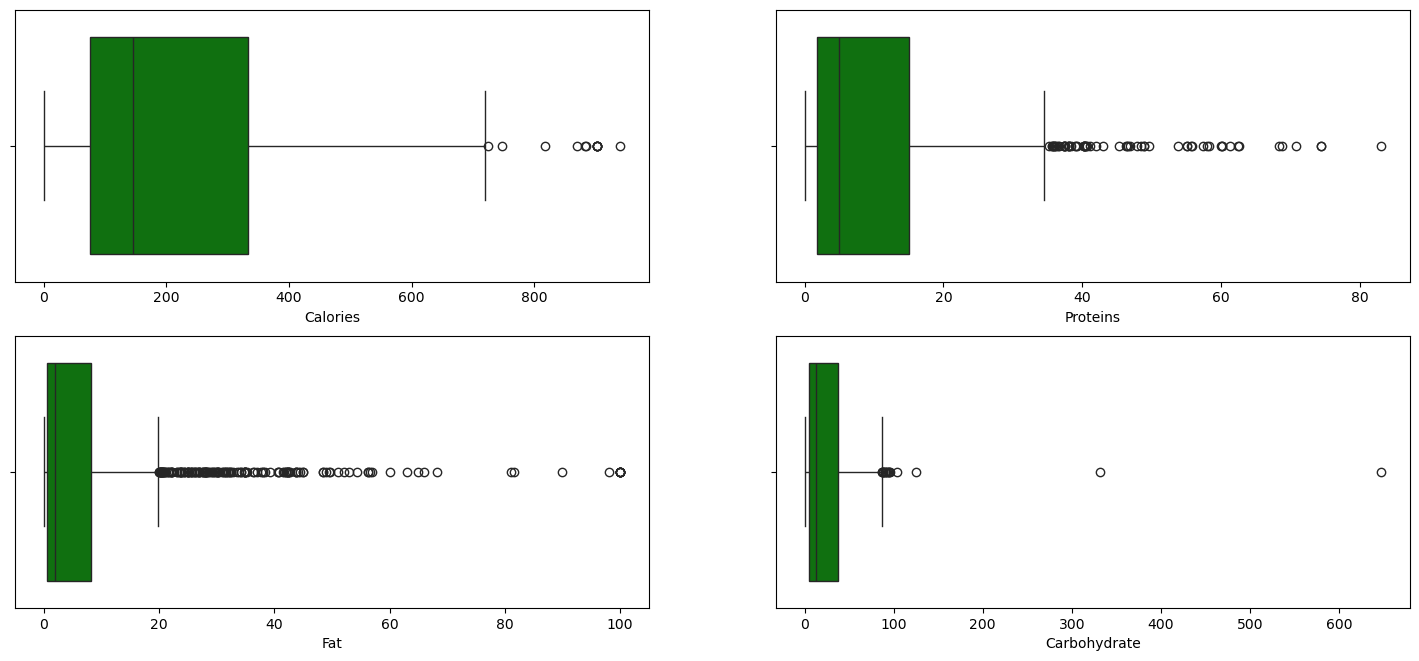

In [22]:
plt.figure(figsize=(18,12))
for i,v in enumerate(column):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.boxplot(x=v, data=df1,color='green')
plt.show()

In [23]:
def drop_iqr_outliers(df1, cols):
    for col in cols:
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1
        df1 = df1[~((df1[col] < (Q1 - 1.5 * IQR)) | (df1[col] > (Q3 + 1.5 * IQR)))]

    return df1

df1 = drop_iqr_outliers(df1, column)

0 Calories
1 Proteins
2 Fat
3 Carbohydrate


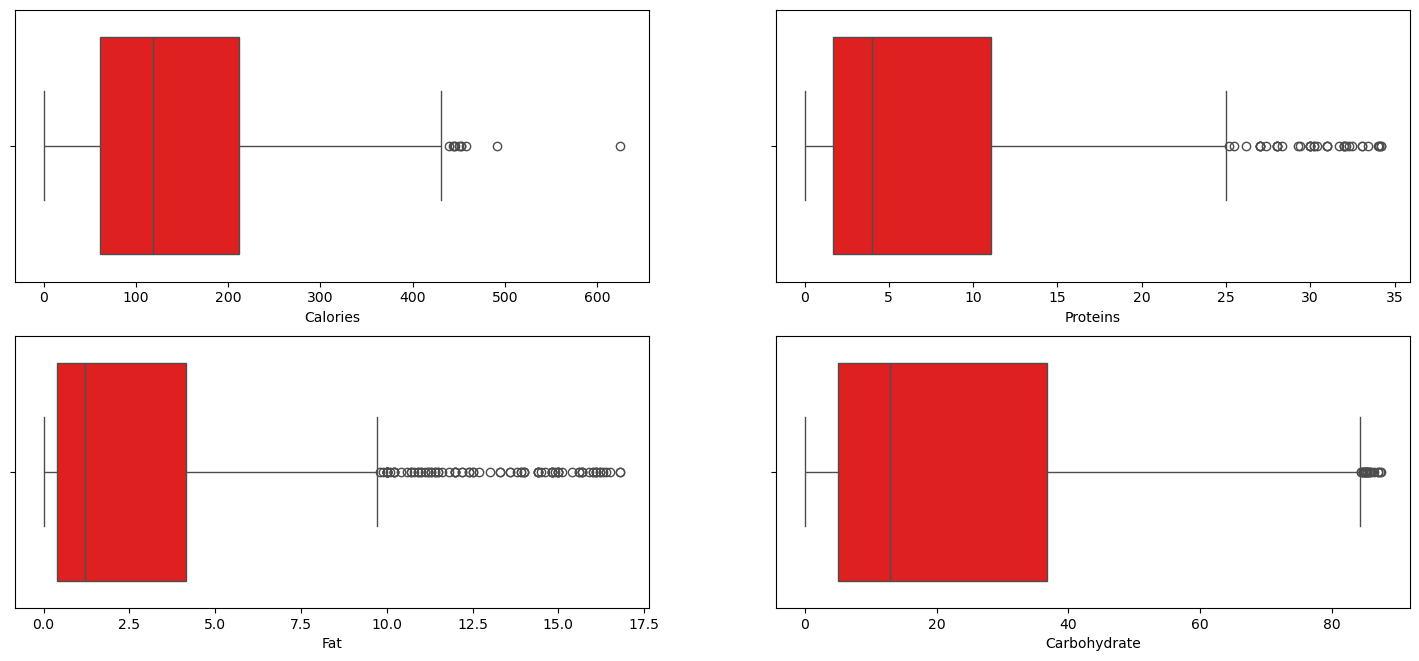

In [24]:
plt.figure(figsize=(18,12))
for i,v in enumerate(column):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.boxplot(x=v, data=df1,color='red')
plt.show()

In [25]:
df1.head()

,Calories,Proteins,Fat,Carbohydrate,Name
2,0.0,0.0,0.2,0.0,Agar-agar
3,45.0,1.1,0.4,10.8,Akar tonjong segar
4,37.0,4.4,0.5,3.8,Aletoge segar
5,85.0,0.9,6.5,7.7,Alpukat segar
6,96.0,3.7,0.6,19.1,Ampas kacang hijau


# Correlation Coefficient

<Axes: >

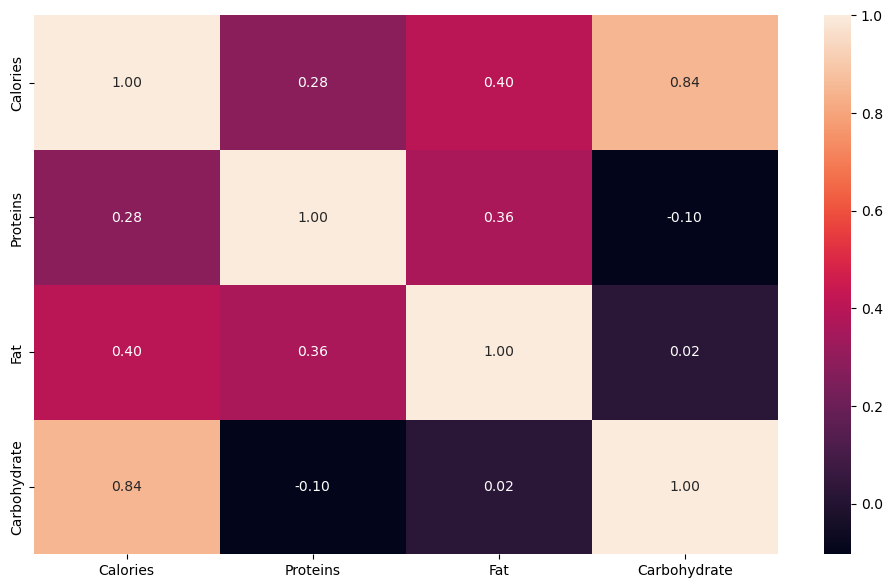

In [26]:
plt.figure(figsize=(12, 7))

corr = df1[column].corr()
sns.heatmap(corr, annot=True, fmt=".2f")

In [27]:
corr_matrix = df1.corr(numeric_only=True)
price_correlation = corr_matrix["Calories"].sort_values(ascending=False)
print(price_correlation)

Calories        1.000000
Carbohydrate    0.844886
Fat             0.404789
Proteins        0.279818
Name: Calories, dtype: float64


# Create Model

In [28]:
df2 = df1.copy()
df2.head(10)

,Calories,Proteins,Fat,Carbohydrate,Name
2,0.0,0.0,0.2,0.0,Agar-agar
3,45.0,1.1,0.4,10.8,Akar tonjong segar
4,37.0,4.4,0.5,3.8,Aletoge segar
5,85.0,0.9,6.5,7.7,Alpukat segar
6,96.0,3.7,0.6,19.1,Ampas kacang hijau
8,75.0,4.1,2.1,10.7,Ampas tahu kukus
9,67.0,5.0,2.1,8.1,Ampas tahu mentah
10,184.0,18.8,14.0,0.0,Anak sapi daging gemuk segar
11,174.0,19.6,10.0,0.0,Anak sapi daging kurus segar
12,190.0,19.1,12.0,0.0,Anak sapi daging sedang segar


In [29]:
df2.to_csv("hitung.csv", encoding='utf-8', index=False)

In [30]:
df2.describe()

,Calories,Proteins,Fat,Carbohydrate
count,1103.000000,1103.000000,1103.000000,1103.000000
mean,152.936174,7.343427,3.015684,24.497824
std,114.807022,7.625309,3.851084,25.730348
min,0.000000,0.000000,0.000000,0.000000
25%,61.000000,1.700000,0.400000,5.000000
50%,119.000000,4.000000,1.200000,13.000000
75%,212.000000,11.050000,4.150000,36.750000
max,625.000000,34.200000,16.800000,87.400000


In [31]:
df2 = df2.drop(['Name'], axis=1)

In [32]:
X = df2.drop('Calories', axis=1)
y = df2['Calories']

Train test split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Menampilkan data X_train dan X_test
print("Train set:", X_train.shape, y_train.shape)
print(X_train.head())
print("\n")
print("Test set:", X_test.shape, y_test.shape)
print(X_test.head())

Train set: (882, 3) (882,)
      Proteins  Fat  Carbohydrate
1227      10.7  7.0           1.6
296        2.0  1.0          15.2
334        1.0  0.2          16.1
336        0.5  0.6          18.2
4          4.4  0.5           3.8


Test set: (221, 3) (221,)
      Proteins  Fat  Carbohydrate
358        0.6  0.3          20.9
1272      22.3  2.9           9.9
451       10.3  3.7           6.7
587       23.8  1.4          60.2
665        2.8  6.8           3.4


**Linear Regression dengan beberapa variabel bebas**

In [36]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [37]:
# Menampilkan koefisien
lr_model.coef_

array([4.0213173 , 8.59521459, 3.8792055 ])

In [38]:
# Menampilkan intercept
lr_model.intercept_

2.9774849466993203

### Prediksi

In [39]:
# Menguji model
y_pred = lr_model.predict(X_test)
y_pred

array([ 89.04423468, 155.98311756, 102.19002401, 344.24630833,
        85.87393132, 104.43437071, 156.96715908, 101.97476582,
        80.8418009 , 354.94257396, 345.02460341, 116.6108659 ,
       338.01975867, 356.80119763, 154.18636382, 126.45422728,
       108.85819181, 351.43953956, 100.28637437, 112.72683174,
        39.84816524, 161.45943489, 346.90500227,  49.51107621,
       121.82139478,  26.80378053, 329.0516149 , 123.77443462,
       332.3068047 ,  84.50899096, 359.39238646,  45.40236363,
       117.35494179, 149.95522777,  29.27483212, 169.47858282,
        23.74885508, 346.69450424,  29.03182557, 174.7392014 ,
       109.63011616, 136.40976763, 162.09839652, 341.48930778,
       395.8472961 ,  63.05355782,  36.31583347,  71.50565308,
        41.39002518,  33.47370447,  77.20391513, 330.12969887,
        33.35579635, 358.6461832 , 136.55994638,  50.28218875,
       129.84793038, 123.61665744, 341.29450674, 332.59660274,
        28.8791482 ,  71.75965966,  52.61335766, 126.38

In [40]:
# test_pred = np.array([[9.2, 28.4, 0.0]])
test_pred = np.array([[23.7, 37.0, 21.3]])
data_pred = lr_model.predict(test_pred)
data_pred

# 280.0	9.2	28.4	0.0

array([498.93272209])

In [41]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("R-squared score:", r2)

Mean squared error: 685.4967782896226
Root mean squared error: 26.181993397937113
R-squared score: 0.9506375012919601


# Evaluasi Model Linier.

In [42]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("R-squared score:", r2)

Mean squared error: 685.4967782896226
Root mean squared error: 26.181993397937113
R-squared score: 0.9506375012919601


# All Regretion

In [207]:
from pycaret.regression import *

ModuleNotFoundError: No module named 'pycaret'

In [208]:
# Initialize the PyCaret environment
exp = setup(data=df, target="Calories")

# Now you can compare models
best = compare_models()

NameError: name 'setup' is not defined

In [ ]:
# from sklearn.linear_model import PassiveAggressiveRegressor

# # Initialize the model
# model = PassiveAggressiveRegressor()

# # Train the model
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# print("Mean squared error:", mean_squared_error(y_test, y_pred))
# print("R2 score:", r2_score(y_test, y_pred))